In [1]:
class Database(object):
    
    """A database of customers with the following properties:

    Attributes:
        dir: directory for which the database is created
        customers: a dictionary of customers organized as 'customer id : cutomer object'
    """
    ID=0
    def __init__(self,filedir):
        '''Initialize a database for directory filedir'''
        import pandas as pd
        import os
        filedir = os.path.abspath(filedir)
        self.dir=filedir
        self.customers={}
        self.createDatabase(filedir)
        self.ID=[]
        self.flag=[]
        self.gender=[]
        self.education=[]
        self.house=[]
        self.age=[]
        self.online=[]
        self.customer=[]
        self.marriage=[]
        self.child=[]
        self.occupation=[]
        self.mortgage=[]
        self.house_owner=[]
        self.region=[]
        self.car_prob=[]
        self.fam_income=[]
        self.data = pd.DataFrame()
        
        
        
    def createDatabase(self,filedir):
        '''Creates a database based on the directory filedir'''
         #get all of the file names in the unpacked file for each file

        import shutil, os
        os.chdir(filedir)
        shutil.unpack_archive(filedir+"\\Computing_project.zip","temp") #unpack data1.zip into 'temp' folder
        filenames = os.listdir("temp") #get all of the file names in the unpacked file

        for fn in filenames: #loop over all the files
            with open("temp/"+fn) as f:# for each file
                print(f)
                self.importFile(f)
            f.close()
        
        shutil.rmtree("temp")                   
        
        
    def importFile(self,file):
        '''Import one file into the database'''
        
        file.readline() #first line contains only headers, so we don't need it
        for line in file:
            line = line.rstrip('\n')
            data=line.split("\t") #split the text by ','

            ID=int(data[0])
            data[5]=data[5].replace('_','0')
            if data[5]=='70>65':
                data[5]='65<=70'
            
            st=data[3]
            data[3]=st[2:]
            st=data[11]
            data[11]=st[1:]
            if(data[5]=='10Unk'):
                data[5]='Unknown'
            
            self.customers[ID]=Customer(data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15])
        
    def total(self):  
        '''Create list of values for each attributes in the customer class which helps in sorting through the array.'''
       
        for i in self.customers:
            self.ID.append(self.customers[i].id)

            self.flag.append(self.customers[i].flag)

            self.gender.append(self.customers[i].gender)

            self.education.append(self.customers[i].education)

            self.house.append(self.customers[i].house)

            self.age.append(self.customers[i].age)

            self.online.append(self.customers[i].online)

            self.customer.append(self.customers[i].cust)

            self.marriage.append(self.customers[i].marriage)

            self.child.append(self.customers[i].child)

            self.occupation.append(self.customers[i].occupation)

            self.mortgage.append(self.customers[i].mortgage)

            self.house_owner.append(self.customers[i].own)

            self.region.append(self.customers[i].region)

            self.car_prob.append(self.customers[i].prob)

            self.fam_income.append(self.customers[i].income)
            
        print('Values appended to lists!')
            
    
    def summary(self):
        '''Summary of the Database object is created by this function.'''
        
        #Define empty dictionary for each variable
        flag_dict={}
        gender_dict={}
        education_dict={}
        age_dict={}
        online_dict={}
        customer_dict={}
        marriage_dict={}
        child_dict={}
        occupation_dict={}
        mortgage_dict={}
        house_owner_dict={}
        region_dict={}
        fam_income_dict={}
        house_val_dict={'min':0,'max':0,'avg':0,'median':0}
        
        for i in self.flag:    
            if i in flag_dict:
                flag_dict[i]=flag_dict[i]+1
            else:
                flag_dict[i]=1
       
        for i in self.gender:
            if i in gender_dict:
                gender_dict[i]=gender_dict[i]+1
            else:
                gender_dict[i]=1

        for i in self.education:
            if i in education_dict:
                education_dict[i]=education_dict[i]+1
            else:
                education_dict[i]=1
        
        self.house = [int(i) for i in self.house]
        house_val_dict['avg']=sum(self.house)/len(self.house)
        house_val_dict['max']=max(self.house)
        house_val_dict['min']=min(self.house)
        house_val_dict['median']=self.house[len(self.house)//2]
        
        for i in self.age:
            if i in age_dict:
                age_dict[i]=age_dict[i]+1
            else:
                age_dict[i]=1
        
        
        for i in self.online:
            if i in online_dict:
                online_dict[i]=online_dict[i]+1
            else:
                online_dict[i]=1
        
        for i in self.customer:
            if i in customer_dict:
                customer_dict[i]=customer_dict[i]+1
            else:
                customer_dict[i]=1
                
        for i in self.marriage:
            if i in marriage_dict:
                marriage_dict[i]=marriage_dict[i]+1
            else:
                marriage_dict[i]=1
                
        for i in self.child:
            if i in child_dict:
                child_dict[i]=child_dict[i]+1
            else:
                child_dict[i]=1
        
        for i in self.occupation:
            if i in occupation_dict:
                occupation_dict[i]=occupation_dict[i]+1
            else:
                occupation_dict[i]=1
        
        
        for i in self.mortgage:
            if i in mortgage_dict:
                mortgage_dict[i]=mortgage_dict[i]+1
            else:
                mortgage_dict[i]=1
        
        for i in self.house_owner:
            if i in house_owner_dict:
                house_owner_dict[i]=house_owner_dict[i]+1
            else:
                house_owner_dict[i]=1
                
        
        for i in self.region:
            if i in region_dict:
                region_dict[i]=region_dict[i]+1
            else:
                region_dict[i]=1
    
        for i in self.fam_income:
            if i in fam_income_dict:
                fam_income_dict[i]=fam_income_dict[i]+1
            else:
                fam_income_dict[i]=1
        
        print('Summary of the variables:\n\n\n')
        print('Purchased vs Not Purchased Frequency Count:')
        {print(i,':',flag_dict[i]) for i in flag_dict}
        print('\nGender:')
        {print(i,':',gender_dict[i]) for i in gender_dict}
        print('\nEducation:')
        {print(i,':',flag_dict[i]) for i in flag_dict}
        print('\nHouse Value Stats:')
        {print(i,':',education_dict[i]) for i in education_dict}
        print('\nAge:')
        {print(i,':',age_dict[i]) for i in age_dict}
        print('\nOnline vs Not Online:')
        {print(i,':',online_dict[i]) for i in online_dict}
        print('\nCustomer Behaviour Class Counts:')
        {print(i,':',customer_dict[i]) for i in customer_dict}
        print('\nMarriage:')
        {print(i,':',marriage_dict[i]) for i in marriage_dict}
        print('\nChild:')
        {print(i,':',child_dict[i]) for i in child_dict}
        print('\nOccupation:')
        {print(i,':',occupation_dict[i]) for i in occupation_dict}
        print('\nMortgage:')
        {print(i,':',mortgage_dict[i]) for i in mortgage_dict}
        print('\nHouse_owner:')
        {print(i,':',house_owner_dict[i]) for i in house_owner_dict}
        print('\nRegion:')
        {print(i,':',region_dict[i]) for i in region_dict}
        print('\nFamily Income:')
        {print(i,':',fam_income_dict[i]) for i in fam_income_dict}
        
        
        
        
    def sorting(self):
        '''Returns the comparison of Quick sort and Bubble sort for the given dataset'''
        
        #Import libraries
        import time
        import numpy as np
        import matplotlib.pyplot as plt
        
        #Define empty list to store execution time for Quick and Bubble sort
        quick = []
        bubble=[]
        
        for k in [5000, 10000, 15000, 20000, len(self.house)]: #Split the entire dataset into cumulative buckets to compare the execution time in case the data doubles or triples in future
            A=self.house[:k]
            start_time = time.time()  #Record start time for quick sort
            b = np.sort(A,kind='quicksort')  #Execute Quick sort
            end_time = time.time()  #Record end time for Quick sort
            quick.append(end_time-start_time)  #Store the execution time in the list

            a = self.house[:k]
            n = len(a)
           
            start_time = time.time()  #Record start time for Bubble sort
            #Steps for Bubble sort
            for i in range(0, n+1):  #Compare each element
                for j in range(0, n-i-1):
                    if a[j]>a[j+1]:
                        a[j+1], a[j] = a[j], a[j+1]
            end_time = time.time()  #Record end time for Bubble sort
            bubble.append(end_time-start_time)  #Store execution time for Bubble sort

        plt.plot([5000, 10000, 15000, 20000, len(self.house)],quick, label = 'Quick Sort')  #Plot graph for Quick sort-Length of dataset v/s time taken
        plt.plot([5000, 10000, 15000, 20000, len(self.house)],bubble, label = 'Bubble Sort')  #Plot graph for Bubble sort-Length of dataset v/s time taken
        plt.legend() #Plot legend for the graph
        plt.xlabel('Length of dataset') #Label the X-axis
        plt.ylabel('Execution time') #Label the Y-axis
        plt.title('Comparison of Quick Sort and Bubble Sort', fontsize = 10, fontweight = 'bold', loc = 'center') #Give graph title
        plt.show()
        plt.savefig('Group4_Sorting.pdf')
        
    
    def to_frame(self):
        '''Convert a DataBase object into a dataframe in case some functions are required to be used which are defined
        in the pandas frame.'''
        
        #Import libraries
        import pandas as pd
        
         #Create an empty DataFrame
        df = pd.DataFrame()
        
        df['ID']=self.ID
        df['Flag']=self.flag
        df['Gender']=self.gender
        df['Education']=self.education
        df['House_value']=self.house
        df['Age']=self.age
        df['Online']=self.online
        df['Cust_Segment']=self.customer
        df['Marital_Status']=self.marriage
        df['Child']=self.child
        df['Occupation']=self.occupation
        df['Mortgage']=self.mortgage
        df['House_owner']=self.house_owner
        df['Region']=self.region
        df['Prob_of_purchase']=self.car_prob
        df['Family_income']=self.fam_income
        

        self.data=df.copy()
        return df
    
    
    def print_frame(self):
        '''Print the given DataFrame'''
        
        print(self.data)   
     
    
    def Simulate(self,n):
        '''Run simulations to determine the probability of a customer from particular segment purchasing car'''
        import numpy as np
        c = 'ABCDEFGHIJ'  #Customer segments
        probs = {}
        
        for p in  range(len(c)): #Get all the segments in the dictionary
            probs[c[p]] = []
            
        for i in range(n):  #Define dictionary for purchase and non-purchase
            positives = {}
            total = {}
            
            for alpha in range(len(c)):
                positives[c[alpha]] = 0
                total[c[alpha]] = 0
        
            
            for j in self.customers:
                
                self.customers[j].genProb()  #Generate the probability for each customer
                rand = np.random.random()     #generate a random number between 0 and 1
               
                categ = self.customers[j].cust  # Check the category of the current customer
                total[categ] +=1
               
                if rand <= self.customers[j].randprob:  #Check whether the customer  buys the car
                    
                    positives[categ] +=1          # update the number of buys for that segment
             
            
            for k in range(len(c)):
                
                probs[c[k]].append(positives[c[k]]/total[c[k]]) # for a single simulation, update the probability of a customer from a segment buying a car
            
        simprobs = {}
        for m in range(len(c)): 
            
            simprobs[c[m]] = sum(probs[c[m]])/len(probs[c[m]]) # store the probability of a customer from each of the segments buying a car
            
        return simprobs
        
    
    def plot_graphs(self):
        '''Returns various graphs for Exploratory Data Analysis for the given dataset'''
        
        #Import libraries
        import pandas as pd
        import numpy as np
        import holoviews as hv
        from holoviews import dim
        import seaborn as sns
        hv.notebook_extension('bokeh')
        import matplotlib.pyplot as plt
        %matplotlib inline
        import bokeh.sampledata
        from matplotlib.backends.backend_pdf import PdfPages
   
        #Get the DataFrame of the given dataset
        data = self.to_frame()
        title = "House Valuation of customers by Marital Status"
        
        #Plot Box and Whisker plot
        boxwhisker = hv.BoxWhisker(data, ['Marital_Status', 'Child'], 'House_value', label=title)
        boxwhisker.opts(show_legend=False, width=600, box_fill_color=dim('Child').str(), cmap='Set1',ylim=(0,6000000),xlabel='Marriage Status, Child Status',ylabel='House Valuation ($)')
        #On Zooming it can be observed that Married people had more expensive houses on an average
        
        out = hv.output(boxwhisker)
        hv.save(boxwhisker,'Group4_Holoviews_BoxWhisker_Plot.html')
        
        edu_order = [" <HS"," HS"," Some College"," Bach"," Grad"]

        #Plot graph for education level and car purchase
        plot1=plt.figure(1)
        ax = sns.countplot(x="Education",hue="Flag", data=data, order=edu_order)
        ax.set( xlabel="Education Level", ylabel="Frequency", title="Distribution of customers by Education level")

        #print("College educated customers are more likely to buy the target product")

        age_order = ["Unknown", "20<=25", "30<=35", "40<=45", "50<=55", "60<=65", "70>65"]

        #Plot graph for age and car purchase
        plot2=plt.figure(2)
        ax1 = sns.countplot(x="Age",hue="Flag", data=data, order=age_order)
        ax1.set( xlabel="Age Category", ylabel="Frequency", title="Distribution of customers by Age")
        #print("The age category of 45 to 65 appears to be ideal customer segment")

        psy_order = ["A","B","C","D","E","F","G","H","I","J"]

        #Plot graph for customer segment and car purchase
        plot3=plt.figure(3)
        ax2 = sns.countplot(x="Cust_Segment",hue="Flag", data=data, order=psy_order)
        ax2.set( xlabel="Customer Profile", ylabel="Frequency", title="Distribution of customers by Customer Profile")
        #print("Customer Psych profile ‘B’ and ‘C’ are more likely to buy the target product")

        #Plot graph for Martial status and car purchase
        plot4=plt.figure(4)
        g = sns.catplot(x="Marital_Status", hue="Flag", col="Child", data=data, kind="count", height=3.6, aspect=.7)

        g.set_axis_labels("Marital_Status", "Frequency")
        g.set_titles("{col_name} - Child")
        
        #print("Married people with a child have a significantly higher probability of buying the target product")
        
        #Save all the graphs in a PDF
        pp = PdfPages('Group4_Visualization_Graphs.pdf')
        pp.savefig(plot1)
        pp.savefig(plot2)
        pp.savefig(plot3)
        pp.savefig(g.fig)
        pp.close()
 
            
    def interactive_map(self):
        '''Returns an interactive USA map with states categorized by regions given the dataset and with information corresponding to that region'''
        
        #Import library
        import pandas as pd
        
        #Get the data in DataFrame
        df = self.to_frame()
        df.dropna(inplace=True)
        
        import holoviews as hv
        hv.notebook_extension('bokeh')
        import bokeh.sampledata
        get_ipython().run_line_magic('matplotlib', 'inline')

        #Categorise the states into the regions
        Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 
                     'New York', 'Pennsylvania']
        Midwest = ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Nebraska', 'Kansas', 'North Dakota', 'Minnesota',
                   'South Dakota', 'Missouri']
        South = ['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
                 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
        West = ['Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 'Wyoming', 'California', 
                'Oregon', 'Washington']


        countries = df.copy() #DataFrame to maintain region-wise statistics
        countries = countries.groupby(['Region']).agg({'House_value' : 'median'}) #Median house price for each region
        car_bought = pd.crosstab(df['Region'],df['Flag']).reset_index() #Cars bought for each region
        own =  pd.crosstab(df['Region'],df['House_owner']).reset_index() #House owners in each regions
        education = pd.crosstab(df['Region'],df['Education']).reset_index() #Count of people for various Education levels for each region
        countries = countries.merge(car_bought, on = 'Region').merge(own, on = 'Region').merge(education, on = 'Region').reset_index() #Merge all the dataframes
        countries.drop('index',axis=1,inplace=True)

        countries['Percent Car bought'] = (countries['Y']/ (countries['Y'] + countries['N']))*100  #Calculate percentage of people who bought the car
        countries['Percent House Owners'] = (countries['Owner']/ (countries['Renter'] + countries['Owner']))*100 #Calculate percentage of people who are owners
        countries['Percent Bachelor and Grads'] = ((countries[' Bach'] + countries[' Grad'])/(countries[' Bach'] + countries[' Grad']+ countries[' Some College'] + countries[' HS'] + countries[' <HS']))*100 #Calculate percentage of people who are Bachelors and Gradustes

        from bokeh.sampledata.us_states import data as states  #Import states dataset

        #Merge the two datasets
        temp = pd.DataFrame(states).transpose().reset_index()
        temp = temp.rename(columns ={'name': 'State'})

        def region(temp):
            '''Returns the region in which a particular state falls in'''

            if temp['State'] in Northeast:  #Categorize states into various regions
                return 'Northeast'
            elif temp['State'] in Midwest:
                return 'Midwest'
            elif temp['State'] in South:
                return 'South'
            elif temp['State'] in West:
                return 'West'
            else:
                return 'Rest'

        temp['Region'] = temp.apply(region, axis = 1) #Categorize the states as per regions

        data = countries.merge(temp, on = 'Region') #merge the dataframe with states data
        out = data.to_dict('records')
        #Plot the US interactive map
        choropleth = hv.Polygons(out, ['lons', 'lats'], [('State', 'State'),('Region','Region'), ('House_value', 'Median House price of region'), ('Percent Car bought', 'Percent Car bought'),('Percent House Owners','Percent House Owners'), ('Percent Bachelor and Grads','Percent Bachelor and Grads')]).opts(title = 'US Region-wise Map', fontsize={'title': 25}) #(key in datd and display name)
        graph = choropleth.options(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                   show_grid=False, show_frame=False, width=2900, height=800,
                   colorbar=False, toolbar='above', line_color='black',
                   color_index='Region',cmap="Pastel1") 
        
        hv.output(graph)
        hv.save(graph,'Group_4_US_interactive_Map.html')  #Save the map in an HTML file
    
    def model_comparison(self):
        
        '''This function does a model comparison on the dataset to indicate which type of algortihm will work better
        for this dataset.'''
        
        data = self.to_frame()
        data['education'] = data['education'].map({'1. HS': 'HS', '2. Some College': 'Some College', '3. Bach': 'Bach',
                                           '0. <HS': '<HS','4. Grad': 'Grad'})
        data['age'] = data['age'].map({'1_Unk': 'Unk', '2_<=25': 'le25', '3_<=35': 'le35','4_<=45':'le45','5_<=55':'le55',
                               '6_<=65': 'le65','7_>65': 'gt65'})
        data['occupation'] = data['occupation'].map({'Sales/Service':'SalesORService','Professional':'Professional',
                                            'Blue Collar':'Blue Collar','Farm':'Farm','Others':'Others',
                                            'Retired':'Retired'})
        data = data.drop(columns=['ID'])
        
                # create dummy variables for all categorical variables
        cols_to_keep = ['car_prob','house_val']
        data_with_dummy = data[cols_to_keep]
        for i in ['flag', 'gender', 'education', 'age', 'online',
               'customer_psy', 'marriage', 'child', 'occupation', 'mortgage',
               'house_owner', 'region', 'fam_income']:
            dummy = pd.get_dummies(data[i], prefix=i)
            data_with_dummy = data_with_dummy.join(dummy.iloc[:, 1:])
        data_with_dummy.columns = data_with_dummy.columns.str.replace(' ', '_')

        # put target variable first
        cols = list(data_with_dummy)
        cols[2], cols[0] = cols[0], cols[2]
        data_with_dummy = data_with_dummy.ix[:,cols]
        
        # OLS Model with np.linalg.lstsq
        Y=np.array(data_with_dummy.flag_Y)
        temp = [np.ones_like(Y)]
        for i in data_with_dummy.drop(columns=['flag_Y']).columns:
            temp.append(np.array(data_with_dummy[i]))
        X=np.vstack(temp)
        np.linalg.lstsq(X.T,Y.T,rcond=-1)
        
        
        # OLS Model with statsmodels
        import statsmodels.formula.api as sm
        fml = "flag_Y ~"
        for i in data_with_dummy.drop(columns=['flag_Y']).columns:
            fml += " " + i + " +"
        fml = fml[:-2]
        result = sm.ols(formula=fml, data=data_with_dummy).fit()
        print(result.summary())
        
        
        # Logit Model with statsmodels
        logit = sm.Logit(data_with_dummy['flag_Y'], data_with_dummy.drop(columns=['flag_Y']))
        result = logit.fit()
        print(result.summary2())
        
        
        # XGBoost with sklearn

        # split data into X and y
        X = data_with_dummy.iloc[:, 1:].values
        y = data_with_dummy.iloc[:, 0].values
        # split data into train and test sets
        from sklearn.model_selection import train_test_split
        seed = 7
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
        #!pip install xgboost
        import xgboost
        classifier = xgboost.XGBClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(y_test, y_pred, normalize=False)
        print(accuracy)
        
        
        # modeling comparison using sklearn
        '''references: https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn'''
        from sklearn.metrics import accuracy_score, log_loss
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
        from sklearn.naive_bayes import GaussianNB
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        from sklearn.model_selection import train_test_split
        #!pip install xgboost
        import xgboost

        classifiers = [
            KNeighborsClassifier(3),
            #SVC(kernel="rbf", C=0.025, probability=True),
            #NuSVC(probability=True),
            xgboost.XGBClassifier(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis()]
        cols=["Classifier", "Accuracy", "Log Loss"]
        log = pd.DataFrame(columns=cols)

        # create train,test dataset
        X = data_with_dummy.iloc[:, 1:].values
        y = data_with_dummy.iloc[:, 0].values
        seed = 7
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

        for clf in classifiers:
            clf.fit(X_train, y_train)
            name = clf.__class__.__name__
            print("="*30)
            print(name)
            print('****Results****')
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            print("Accuracy: {:.4%}".format(acc))
            train_predictions = clf.predict_proba(X_test)
            ll = log_loss(y_test, train_predictions)
            print("Log Loss: {}".format(ll))
            log_entry = pd.DataFrame([[name, acc*100, ll]], columns=cols)
            log = log.append(log_entry)

        print("="*30)
    
    def greedy_vs_bruteforce(self):
        '''Returns the comparison of AUC for given set of tuning parameters by two selection processes- Greedy and Brute Force'''
        
        #Import libraries
        import numpy as np
        from xgboost.sklearn import XGBClassifier 
        from sklearn.metrics import roc_auc_score
        from sklearn.model_selection import train_test_split
        from sklearn import preprocessing 
        import time
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_pdf import PdfPages
        
        le = preprocessing.LabelEncoder()
        
        #Transform the data and split to train and test
        sample = self.data.apply(le.fit_transform)
        X_train, X_test, y_train, y_test = train_test_split(sample.drop(['Flag','ID'],axis=1),np.array(sample['Flag']), test_size = 0.30, random_state = 42)
        
        #Evaluate the Brute Force algorithm for parameter tuning
        plot1 = plt.figure(1)
        start = time.time()
        max_roc = 0
        learning_rate = 0
        trees = 0
        for i in np.linspace(0.05,0.15,5):  #Iterate through every element, i = learning_rate
            roc = list()
            trees1 = list()
            for j in np.linspace(50,200,6, dtype= int):  #Iterate through every element, j = number of estimators
                classifier=XGBClassifier(learning_rate=i,n_estimators=j)
                classifier.fit(X_train, y_train)   #Model fit
                y_pred = classifier.predict_proba(X_test)[:,1]   #Compute the predicted values of target variable
                roc.append(roc_auc_score(y_test, y_pred))  #Compute AUC metric and store in a list
                trees1.append(j)           #Store the number of estimators in a list
             
                if max_roc < roc_auc_score(y_test, y_pred):  #Always store max AUC value and corresponding learning rate and number of estimators
                    max_roc = roc_auc_score(y_test, y_pred)
                    trees = j
                    learning_rate = i
            plt.plot(trees1,roc,label=i)  #Plot the graph
        
        plt.xlabel("No of estimators")
        plt.ylabel("AUC Achieved")
        plt.legend()
        plt.title("Comparison of AUC achieved by various combinations of learning rates and estimators for Brute Force")
        stop = time.time()
        
        print("Results from Brute force hyper Parameter Tuning")
        print("Maximum AUC achieved :",max_roc)
        print("Number of Estimators:",trees)
        print("Learning Rate:", learning_rate)
        print('Time taken to compute by Brute Search:', stop-start, 'seconds.')
        
        
        
        auc_score = []
        time_n = []
        
        #Evaluate Randomized Search algorithm
        for i in range(15,25):
            max_roc=0
            trees = 0
            learning_rate = 0
            start = time.time()
            for n in range(i):
                lr = np.random.choice(np.linspace(0.05,0.15,5))  #Learning rate
                ne = np.random.choice(np.linspace(50,200,6, dtype= int))  #Number of estimators
                classifier=XGBClassifier(learning_rate=lr,n_estimators=ne)
                classifier.fit(X_train, y_train)  #Model fit
                y_pred = classifier.predict_proba(X_test)[:,1]

                roc = roc_auc_score(y_test, y_pred)
                if max_roc < roc:    #Always store max AUC value and corresponding learning rate and number of estimators
                    max_roc = roc
                    trees = j
                    learning_rate = i
            stop = time.time()
            time_n.append((stop-start))
            auc_score.append(max_roc)
        
        #Plot a comparison graph
        plot2 = plt.figure(2)
        plt.plot(range(15,25),auc_score)
        plt.xlabel("Time Taken")
        plt.ylabel("AUC Achieved")
        plt.title("Plot to check how fast a good AUC can be achieved")
        
        pp = PdfPages('Group4_Brute_Vs_Randomized.pdf')
        pp.savefig(plot1)
        pp.savefig(plot2)
        pp.close()
        
        
    
    def model_comparison(self):
        
        import pandas as pd
        import numpy as np
        data = self.to_frame()
        data['Education'] = data['Education'].map({' HS': 'HS', ' Some College': 'Some College', ' Bach': 'Bach',
                                           ' <HS': '<HS',' Grad': 'Grad'})
        data['Age'] = data['Age'].map({'Unknown': 'Unk', '20<=25': 'le25', '30<=35': 'le35','40<=45':'le45','50<=55':'le55',
                               '60<=65': 'le65','65<=70': 'gt65'})
        data['Occupation'] = data['Occupation'].map({'Sales/Service':'SalesORService','Professional':'Professional',
                                            'Blue Collar':'Blue Collar','Farm':'Farm','Others':'Others',
                                            'Retired':'Retired'})
        data = data.drop(columns=['ID'])
        
        # create dummy variables for all categorical variables
        cols_to_keep = ['Prob_of_purchase','House_value']  #Columns not to be converted to dummy variables
        data_with_dummy = data[cols_to_keep]
        for i in ['Flag', 'Gender', 'Education', 'Age', 'Online',
               'Cust_Segment', 'Marital_Status', 'Child', 'Occupation', 'Mortgage',
               'House_owner', 'Region', 'Family_income']:
            dummy = pd.get_dummies(data[i], prefix=i)
            data_with_dummy = data_with_dummy.join(dummy.iloc[:, 1:])
        data_with_dummy.columns = data_with_dummy.columns.str.replace(' ', '_')

        # put target variable first
        cols = list(data_with_dummy)
        cols[2], cols[0] = cols[0], cols[2]
        data_with_dummy = data_with_dummy.ix[:,cols]
        
        
        
        
        # XGBoost with sklearn

        # split data into X and y
        X = data_with_dummy.iloc[:, 1:].values
        y = data_with_dummy.iloc[:, 0].values
        # split data into train and test sets
        from sklearn.model_selection import train_test_split
        seed = 7
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
        
        #!pip install xgboost in case XGBoost isn't installed
        import xgboost
        classifier = xgboost.XGBClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(y_test, y_pred, normalize=False)
        print(accuracy)
        
        
        # modeling comparison using sklearn
        '''references: https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn'''
        
        #import required packages
        from sklearn.metrics import accuracy_score, log_loss
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
        from sklearn.naive_bayes import GaussianNB
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        from sklearn.model_selection import train_test_split
        #!pip install xgboost
        import xgboost

        #Create a list of all the models
        classifiers = [
            KNeighborsClassifier(3),
            #SVC(kernel="rbf", C=0.025, probability=True),
            #NuSVC(probability=True),
            xgboost.XGBClassifier(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis()]
        cols=["Classifier", "Accuracy", "Log Loss"]
        log = pd.DataFrame(columns=cols)

        # create train,test dataset
        X = data_with_dummy.iloc[:, 1:].values
        y = data_with_dummy.iloc[:, 0].values
        seed = 7
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

        #Model fit for all the models
        for clf in classifiers:
            clf.fit(X_train, y_train)
            name = clf.__class__.__name__
            print("="*30)
            print(name)
            print('****Results****')
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            print("Accuracy: {:.4%}".format(acc))
            train_predictions = clf.predict_proba(X_test)
            ll = log_loss(y_test, train_predictions)
            print("Log Loss: {}".format(ll))
            log_entry = pd.DataFrame([[name, acc*100, ll]], columns=cols)
            log = log.append(log_entry)

        print("="*30)

            
        


In [2]:
class Customer(object):
    
    """A customer class with the following properties:

    Attributes:
        id: an integer representing the customer's id.
        gender: a string representing customers's gender.
        days: a list of day of week purchases
        amounts: a list of purchase amounts 
    """
        
    def __init__(self,cid,cflag,cgen,cedu,chouse, cage, conline, custom, cmarr,cchild, coccu, cmort, cown, creg,ccar, cfam):
        '''Initialize a customer with id=cid and gender=cgen'''
        self.id=cid
        self.flag=str(cflag)
        self.gender=cgen
        self.education =cedu 
        self.house=chouse
        self.age=cage
        self.online=conline
        self.cust=custom
        self.marriage=cmarr
        self.child=cchild
        self.mortgage=cmort
        self.occupation=coccu
        self.own=cown
        self.region = creg
        self.prob=ccar
        self.income=cfam
        self.randprob=0

        
    def genProb(self):
        
        '''Generate a random probability based on the probability rank column.'''
        
        prob = int(self.prob)
        
        if prob == 1:
            rprob = 0.9
            
        elif prob == 2:
            rprob = 0.8
 
        elif prob == 3:
            rprob = 0.7
            
        elif prob == 4:
            rprob = 0.6
            
        elif prob == 5:
            rprob = 0.5
            
        elif prob == 6:
            rprob = 0.4
        
        elif prob == 7:
            rprob = 0.3
            
        elif prob == 8:
            rprob = 0.2
        
        elif prob == 9:
            rprob = 0.1
        else:
            rprob = 0
        
        
        self.randprob = rprob

# Creation of an object of class Database
Creation of an object of class Database which stores a dictionary of objects from class Customers

In [13]:
D=Database('C:\\Users\\tirth\\OneDrive\\Desktop\\Coursework\\Computing For Analytics\\Project')

<_io.TextIOWrapper name='temp/sales_data.txt' mode='r' encoding='cp1252'>


Appending the various attributes in the object Database which are lists of attributes of Customer objects in the Database onject.

In [4]:
D.total()

Values appended to lists!


# Summary of the dataset
Getting the summary statistics of the data stored in the Database object

In [5]:
D.summary()

Summary of the variables:



Purchased vs Not Purchased Frequency Count:
Y : 13339
N : 10219

Gender:
F : 8952
M : 14198
U : 408

Education:
Y : 13339
N : 10219

House Value Stats:
 Bach : 5992
 Some College : 6548
 <HS : 2060
 HS : 5047
 Grad : 3911

Age:
60<=65 : 3987
50<=55 : 6091
40<=45 : 4988
Unknown : 3082
65<=70 : 2308
30<=35 : 2515
20<=25 : 587

Online vs Not Online:
Y : 16527
N : 7031

Customer Behaviour Class Counts:
B : 5152
C : 5252
F : 2189
G : 2345
I : 1163
D : 1317
A : 804
E : 3752
J : 1201
H : 383

Marriage:
Married : 19272
Single : 4286

Child:
N : 7313
Y : 11187
U : 5058

Occupation:
Professional : 9820
Blue Collar : 3984
Retired : 2020
Sales/Service : 6649
Others : 916
Farm : 169

Mortgage:
Med : 3234
Low : 16485
High : 3839

House_owner:
Owner : 18781
Renter : 4777

Region:
West : 5135
South : 9186
Midwest : 4888
Northeast : 4211
Rest : 138

Family Income:
G : 2606
I : 1077
E : 4882
J : 1077
C : 1358
F : 4101
D : 2473
A : 1193
L : 1082
B : 1124
H : 1602
K : 970
U : 

# Sorting and Scalability

Here, we are checking the performance of Quick Sort and Bubble sort with increase in size of data. We see that Quicksort works fine even with increase in data size whereas time taken by bubble sort increases exponentially with increase in data size.

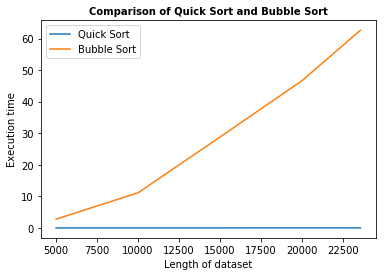

Time Taken to sort various sets of observations for both the algorithms is  152.10251235961914 seconds.


<Figure size 432x288 with 0 Axes>

In [12]:
import time
start = time.time()
D.sorting()
stop = time.time()
print('Time Taken to sort various sets of observations for both the algorithms is ', (stop - start), 'seconds.')

# EDA using Holoview and Seaborn 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
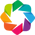

:BoxWhisker   [Marital_Status,Child]   (House_value)

Time Taken to plot various graphs for the data is  3.59051251411438 seconds.


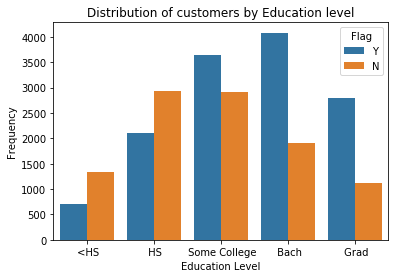

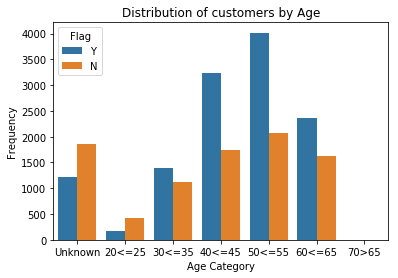

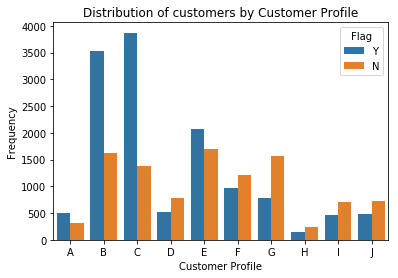

<Figure size 432x288 with 0 Axes>

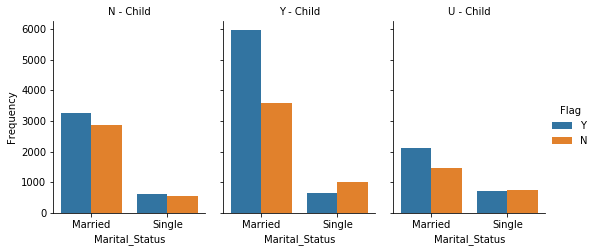

In [7]:
import time
start = time.time()
D.plot_graphs()
stop = time.time()
print('Time Taken to plot various graphs for the data is ', (stop - start), 'seconds.')

1. **Box and Whiskers plot**: On Zooming it can be observed that Married people had more expensive houses on an average.
2. **Education v/s Car purchase**: College educated customers are more likely to buy the car.
3. **Age v/s Car purchase**: People between the ages of 45 and 65 are more likely to buy the car.
4. **Customer Segment v/s Car purchase**: Customers falling in segements ‘B’ and ‘C’ are more likely to buy the car.
5. **Martial Status + Child v/s Car purchase**: Married people with a child have a significantly higher probability of buying the target product


#  Interactive Map using Choropleth
This graph will give an interactive representation of the data statistics (upon hover) corresponding to four main regions- **Northeast, South, West and Midwest**. 
The remaining regions are categorized under the 'Rest' category.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
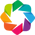

:Polygons   [lons,lats]   (State,Region,House_value,Percent Car bought,Percent House Owners,Percent Bachelor and Grads)

Time Taken to plot various graphs for the data is  1.2157464027404785 seconds.


In [8]:
start = time.time()
D.interactive_map()
stop = time.time()
print('Time Taken to plot various graphs for the data is ', (stop - start), 'seconds.')

# Monte Carlo Simulation
Simulate function is defined to determine the probability of a customer belonging to a particular customer segment purchasing a car. Monte Carlo Simulation method is used here for simulation. A randomly generated probability is compared with the probability defined in the **Customer** class depending upon the rank column given in the dataset. If the randomly generated probability is less than the probability defined then the customer purchases the car. Running this algorithm 'n' times will give the probability of each customer segment purchasing a car.

In [9]:
D.Simulate(1000)

{'A': 0.6348594527363182,
 'B': 0.8057734860248427,
 'C': 0.7826302361005325,
 'D': 0.7006932422171601,
 'E': 0.6232953091684436,
 'F': 0.5366162631338506,
 'G': 0.35213688699360396,
 'H': 0.5838433420365527,
 'I': 0.5684875322441948,
 'J': 0.5569467110741025}

# Model Comparison
Using the given dataset, we try to determine the probability of a customer buying a car. This is determined using various categorical attributes defining the demographics of the customer. We used a classification problem approach and compared various models to determine the best performing model i.e. model giving highest accuracy for the validation data.

In [10]:
D.model_comparison()

C:\Users\tirth\Anaconda3\lib\site-packages\ipykernel_launcher.py:766: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


4921
KNeighborsClassifier
****Results****
Accuracy: 58.4748%
Log Loss: 4.508253953780929
XGBClassifier
****Results****
Accuracy: 69.6237%
Log Loss: 0.5841026918706445
DecisionTreeClassifier
****Results****
Accuracy: 60.1160%
Log Loss: 13.756580020081707


C:\Users\tirth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 65.8885%
Log Loss: 1.2053924245880876
AdaBoostClassifier
****Results****
Accuracy: 69.2841%
Log Loss: 0.6882731067397082
GradientBoostingClassifier
****Results****
Accuracy: 69.6520%
Log Loss: 0.5839695938464119
GaussianNB
****Results****
Accuracy: 60.9508%
Log Loss: 0.6993948948998095
LinearDiscriminantAnalysis
****Results****
Accuracy: 68.8172%
Log Loss: 0.5898714526859813
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 66.2139%
Log Loss: 2.9139609282861274


# Function to demonstrate Hyper-parameter tuning of a boosting model using randomized search approach and brute force approach

From the above model comparison, we found that a boosting algorithm is the best performing algorithm. However, better accuracy can be achieved by tuning the hyperparameters of this model. We used **Brute Force** and **Randomized search** to determine the best combination of the parameters (learning rate and number of estimators). To determine the best approach, we compared the AUC metric (metric to determine the prediction accuracy) and execution time for both the approaches

Results from Brute force hyper Parameter Tuning
Maximum AUC achieved : 0.7633346543333083
Number of Estimators: 200
Learning Rate: 0.075
Time taken to compute by Brute Search: 55.90956926345825 seconds.


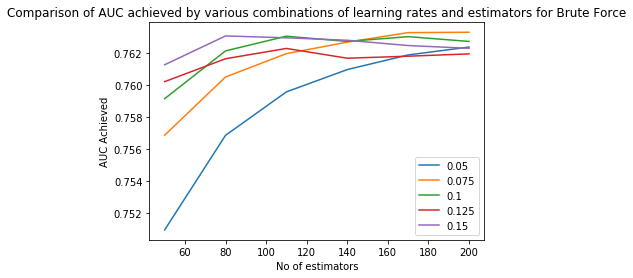

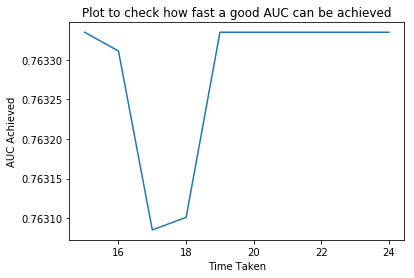

In [11]:
D.greedy_vs_bruteforce()

We can observe that brute search algorith gave the besrt result but took more than 56 seconda to complete. On the other hand,
randomised search gave a good result very similar to the brute force in only 18 seconds. Though the numbers can change, however,
it clearly shows that it is a better method to search when the accuracy required the model is not very high.